# DIGUM101: Factors Impacting Crime Rates in Los Angeles

Sia Sama - Summer 2024

## Research Questions: 

Which variable, gender or season, impacts crime rates more? Have crime rates been increasing or decreasing over time and are crimes being solved more efficently (investigations ongoing vs arrests made)? 

## Data Source 

This dataset reflects incidents of crime in Los Angeles dating back to 2020. It can be found at https://catalog.data.gov/dataset/crime-data-from-2020-to-present

In [11]:
import sys
!{sys.executable} -m pip install pandas

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip


In [18]:
import sys
!{sys.executable} -m pip install nltk

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 613.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 690.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 696.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 kB 759.8 kB/s eta 0:00:0000:0100:01
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 696.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 719.5 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip


In [20]:
import sys
!{sys.executable} -m pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 647.0 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip


In [22]:
import sys
!{sys.executable} -m pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 280.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 672.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 725.6 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 719.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 686.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 714.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 739.0 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip


In [10]:
import pandas as pd 
import numpy as np
import nltk
import praw
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

In [1]:
import pandas as pd
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
print(df.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                

## Visualizing the Data by Gender

In [17]:
print(df['Vict Sex'].isnull().sum())

df.dropna(subset=['Vict Sex'], inplace=True) 
df = df[df['Vict Sex'].isin(['M', 'F'])]

gender_counts = df['Vict Sex'].value_counts()

print(gender_counts)

0
Vict Sex
M    389037
F    346781
Name: count, dtype: int64


Visualize Male vs Female

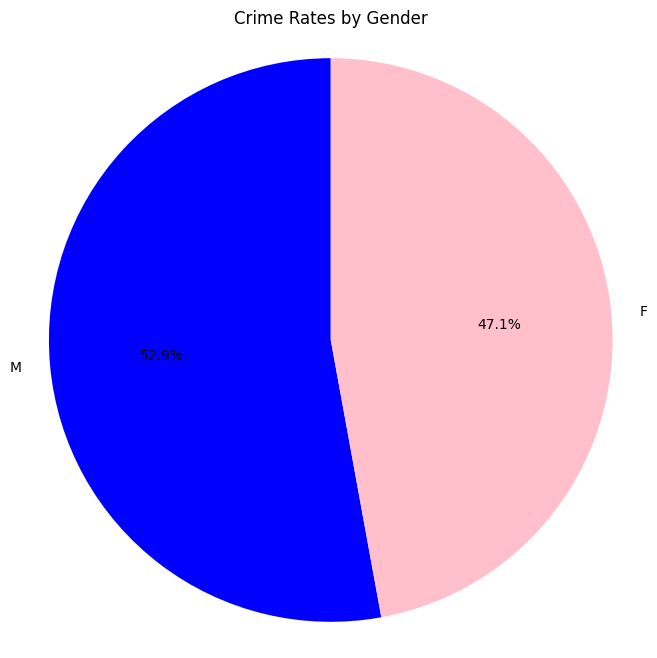

In [19]:
plt.figure(figsize=(8, 8))  
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Crime Rates by Gender')
plt.axis('equal') 
plt.show()

## Visualizing the Data by Season

In [8]:
import pandas as pd
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')  
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
df = df[(df['DATE OCC'].dt.year >= 2020) & (df['DATE OCC'].dt.year <= 2023)]

def get_season(date):
    year = date.year
    if year < 2020 or year > 2023:
        return None  # Return None or similar if the year is outside the 2020-2023 range
    seasons = {
        'Spring': (pd.Timestamp(year=year, month=3, day=21), pd.Timestamp(year=year, month=6, day=20)),
        'Summer': (pd.Timestamp(year=year, month=6, day=21), pd.Timestamp(year=year, month=9, day=20)),
        'Autumn': (pd.Timestamp(year=year, month=9, day=21), pd.Timestamp(year=year, month=12, day=20)),
        'Winter': (pd.Timestamp(year=year, month=12, day=21), pd.Timestamp(year=year + 1, month=3, day=20))
    }
    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 'Winter'  # Default to Winter if not found in other ranges

df['Season'] = df['DATE OCC'].apply(get_season)

print(df.head())

       DR_NO               Date Rptd   DATE OCC  TIME OCC  AREA  AREA NAME  \
0  190326475  03/01/2020 12:00:00 AM 2020-03-01      2130     7   Wilshire   
1  200106753  02/09/2020 12:00:00 AM 2020-02-08      1800     1    Central   
2  200320258  11/11/2020 12:00:00 AM 2020-11-04      1700     3  Southwest   
3  200907217  05/10/2023 12:00:00 AM 2020-03-10      2037     9   Van Nuys   
4  220614831  08/18/2022 12:00:00 AM 2020-08-17      1200     6  Hollywood   

   Rpt Dist No  Part 1-2  Crm Cd                               Crm Cd Desc  \
0          784         1     510                          VEHICLE - STOLEN   
1          182         1     330                     BURGLARY FROM VEHICLE   
2          356         1     480                             BIKE - STOLEN   
3          964         1     343  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4          666         2     354                         THEFT OF IDENTITY   

   ...   Status Desc  Crm Cd 1 Crm Cd 2 Crm Cd 3  Crm Cd 4  \


In [9]:
season_counts = df['Season'].value_counts()

print(season_counts)

Season
Summer    224078
Autumn    220646
Spring    217605
Winter    213977
Name: count, dtype: int64


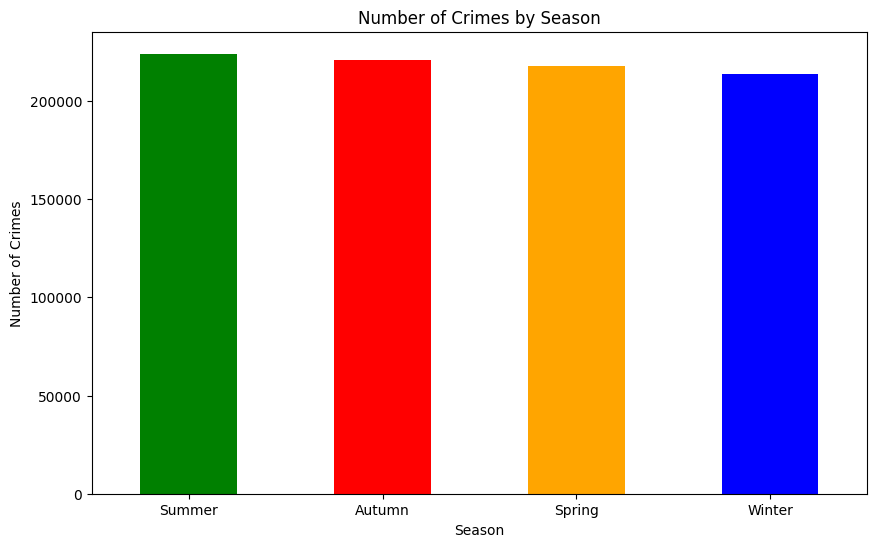

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color=['green', 'red', 'orange', 'blue'])
plt.title('Number of Crimes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

## Visualizing Trend over Time

In [19]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

df['Year'] = df['DATE OCC'].dt.year
yearly_crimes = df['Year'].value_counts().sort_index() 

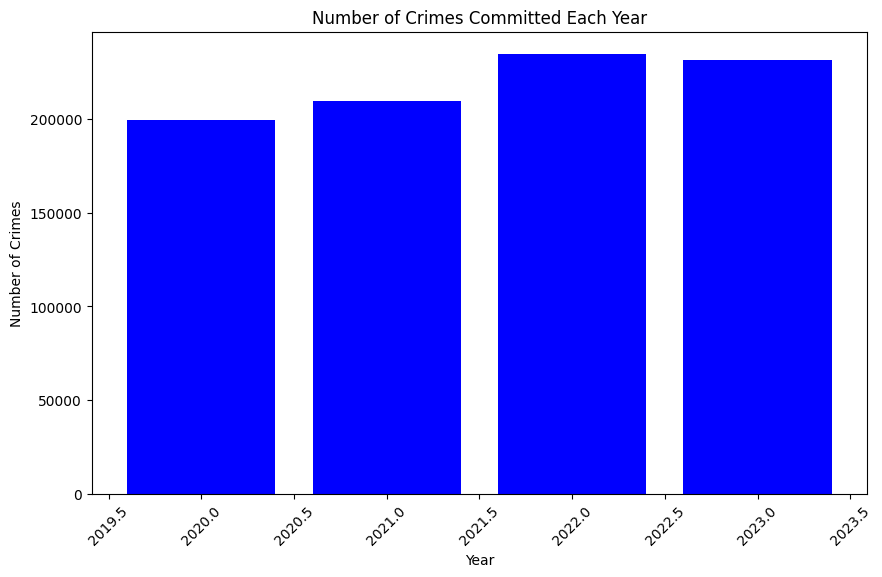

In [21]:
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.bar(yearly_crimes.index, yearly_crimes.values, color='blue') 
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Committed Each Year')
plt.xticks(rotation=45)
plt.show()

## Visualizing Year vs Status: 

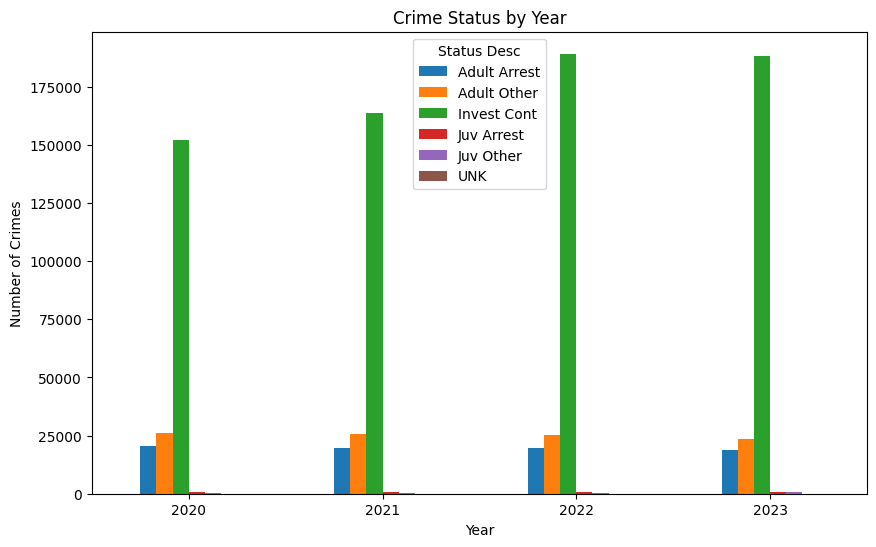

In [22]:
df['Year'] = pd.to_datetime(df['DATE OCC']).dt.year
status_counts = df.groupby(['Year', 'Status Desc']).size().unstack(fill_value=0)

# Plotting
status_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Crime Status by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.legend(title='Status Desc')
plt.show()

# Findings

Gender: More crimes (52.9% of crimes) are committed by men as compared to women (47.1% of crimes)

Season: The season in which the most amount of crimes are committed is Winter. The season in which the least amount of crimes are committed is Autumn. 

Trend over Time: There was a gradual increase in crime from 2019 to 2022. In 2022 the rate dropped slightly. 

Status: The amount of arrests made vs investigation ongoing continues to remain very similar over the years. Consistently, there is a much larger portion of crimes in which the investigation is ongoing rather than arrests are made.

## Conclusion & Implications

The analysis conducted in this project provides substantial insights into crime patterns related to gender and seasonal variations. These findings have important implications including: 
1) Targeted Crime Prevention: Law enforcement agencies and programs can use this data to develop targeted crime prevention strategies. Knowing that crime peaks in the Winter can allow for these organizations to better prepare to allocate resources for crime prevention during this time. This can help reduce crime rates. 
2) Policy Making: Policymakers can use this information to create legislation that addresses the cause of these differences in crime rates per season. Policies can focus on increasing the penalities for certain crimes when they are most committed. Strategies + policies can also be created to help increase the rate at which arrests are made for these crimes.
3) Further Research: More research can be done by comparing these variables to other data to explore why crime hightens during specific times of the year. Understanding why this occurs can lead to intervention. 